# 5. Statistics in Python


**Why Python for statistics?**

R is a language dedicated to statistics. Python is a general-purpose language with statistics modules. R has more statistical analysis features than Python, and specialized syntaxes. However, when it comes to building complex analysis pipelines that mix statistics with e.g. image analysis, text mining, or control of a physical experiment, the richness of Python is an invaluable asset.

### 5.1 Data representation and interaction

The setting that we consider for statistical analysis is that of multiple observations or samples described by a set of different attributes or features. The data can than be seen as a 2D table, or matrix, with columns giving the different attributes of the data, and rows the observations. For instance, the data contained in examples/brain_size.csv:

```
"";"Gender";"FSIQ";"VIQ";"PIQ";"Weight";"Height";"MRI_Count"
"1";"Female";133;132;124;"118";"64.5";816932
"2";"Male";140;150;124;".";"72.5";1001121
"3";"Male";139;123;150;"143";"73.3";1038437
"4";"Male";133;129;128;"172";"68.8";965353
"5";"Female";137;132;134;"147";"65.0";951545
```

### 5.1.1 The pandas data frame

We will store and manipulate this data in a **pandas.DataFrame**, from the pandas module. It is the Python equivalent of the spreadsheet table. It is different from a 2D numpy array as it has named columns, can contain a mixture of different data types by column, and has elaborate selection and pivotal mechanisms. 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('examples/brain_size.csv', sep=';', na_values=".")
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


**Creating from arrays**: A `pandas.DataFrame` can also be seen as a dictionary of 1D ‘series’, eg arrays or lists. If we have 3 numpy arrays:

In [3]:
import numpy as np
t = np.linspace(-6, 6, 10)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [4]:
pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,cos,sin,t
0,0.960170,0.279415,-6.000000
1,-0.045706,0.998955,-4.666667
2,-0.981674,0.190568,-3.333333
3,-0.416147,-0.909297,-2.000000
4,0.785887,-0.618370,-0.666667
5,0.785887,0.618370,0.666667
6,-0.416147,0.909297,2.000000
7,-0.981674,-0.190568,3.333333
8,-0.045706,-0.998955,4.666667
9,0.960170,-0.279415,6.000000


### 5.1.2 Manipulating data

data is a **pandas.DataFrame, that resembles R's dataframe:

In [5]:
data.shape  # 40 rows and 8 columns

(40, 8)

In [6]:
data.columns  # it has columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [7]:
print(data['Gender'])  # Columns can be addressed by name

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [8]:
# Simpler selector
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

In [9]:
# For a quick view on a large dataframe, use its describe mehod:
data.describe()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


**groupby**: splitting a dataframe on values of categorical variables:

In [10]:
groupby_gender = data.groupby('Gender')

In [11]:
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [12]:
# groupby_gender is a powerful object that exposes many operations on the resulting roub of dataframes:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


### 5.1.3 Plotting data

Pandas comes with some plotting tools (pandas.plotting, using matplotlib behind the scene) to display statistics of the data in data frames

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

Female         Axes(0.1,0.15;0.363636x0.75)
Male      Axes(0.536364,0.15;0.363636x0.75)
dtype: object

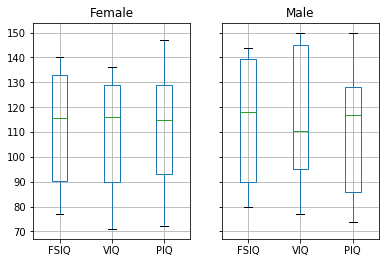

In [14]:
# Box plots of different comlumns for each gender
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feafa2c7dd8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7feaf9ceeda0>]], dtype=object)

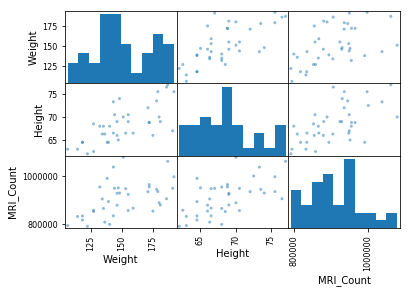

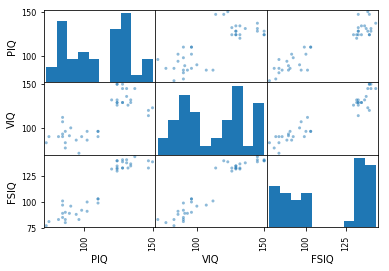

In [15]:
# Scatter matrices for different columns
scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

### 5.2. Hypothesis testing: comparing two groups

For simple statistical tests, we will use the scipy.stats sub-module of scipy:

In [16]:
from scipy import stats

### 5.2.1. 1-sample t-test: testing the value of a population mean

**scipy.stats.ttest_1samp()** tests if the population mean of data is likely to be equal to a given value. It returns the T-statistic, and the p-value

In [17]:
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

### 5.2.2. 2-sample t-test: testing for difference across populations

We have seen above that the mean VIQ in the male and female populations were different. To test if this is significant, we do a 2-sample t-test with **scipy.stats.ttest_ind()**:

In [18]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

Ttest_indResult(statistic=-0.77261617232750113, pvalue=0.44452876778583217)

### 5.2.3. Paired tests: repeated measurements on the same individuals

PIQ, VIQ, and FSIQ give 3 measures of IQ. Let us test if FISQ and PIQ are significantly different

### 5.3. Linear models, multiple factors, and analysis of variance

### 5.3.1 A simple linear regression

Given a set of observations, $x$ and $y$, we want to test the hypothesis that $y$ is a linear function of x:

$y = \beta_{0} + \beta_{1}x + \epsilon$

We will use the **statsmodels** module to :
1. Fit a linear model. We will use teh simplest strategy, ordinary least squares (OLS)
2. Test that $\beta{1}$ is non zero

In [19]:
import numpy as np

In [20]:
np.random.seed(1)
x = np.linspace(-5, 5, 20)
y = -5 + 3*x + 4*np.random.normal(size=x.shape)  # normal distributed noise
data = pd.DataFrame({'x': x, 'y': y})

In [21]:
from statsmodels.formula.api import ols

In [23]:
model = ols('y ~ x', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Sat, 02 Sep 2017   Prob (F-statistic):           8.56e-08
Time:                        20:50:35   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

### 5.3.2. Categorical variables: comparing groups or multiple categories

Let us go back the data on brain size.

We can write a comparison between IQ of male and female using a linear model:

In [26]:
data = pd.read_csv('examples/brain_size.csv', sep=';', na_values=".")
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Sat, 02 Sep 2017   Prob (F-statistic):              0.445
Time:                        21:08:59   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

**Tips on specifying model**

**Forcing categorical**: the ‘Gender’ is automatically detected as a categorical variable, and thus each of its different values are treated as different entities.

An integer column can be forced to be treated as categorical using:

```python
model = ols('VIQ ~ C(Gender)', data).fit()
```

**Intercept**: We can remove the intercept using - 1 in the formula, or force the use of an intercept using + 1.